In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data=pd.read_csv('buat basket analysis.csv')
print(f'Shape of data: {data.shape[0]} rows and {data.shape[1]} columns')

Shape of data: 170839 rows and 3 columns


In [3]:
data.head()

,user_id,id,name
0,1,3695,Program Baz Wheels asdsadasdssss
1,1,6094,QA Program : Trace
2,15,253,Ilmuwan Muda – Nano Center Indonesia NEW
3,15,1430,rqwrqw 213123
4,33,6094,QA Program : Trace


In [4]:
data.describe(include=[np.object])  

C:\Users\kana\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,name
count,170839
unique,855
top,rqwrqw 213123
freq,23930


In [5]:
data.describe()

,user_id,id
count,1.708390e+05,170839.000000
mean,1.199300e+06,2202.135215
std,9.200483e+05,1478.530218
min,1.000000e+00,231.000000
25%,3.002740e+05,1270.000000
50%,1.130341e+06,1402.000000
75%,1.884125e+06,3130.000000
max,4.621618e+06,6342.000000


In [6]:
#data = data.loc[(data["program"] != "keranjang belanja user") | (data["program"] != "'keranjang belanja user")]

In [6]:
data.shape

(170839, 3)

In [8]:
#df=data.loc[data["program"] != "keranjang belanja user"]
#df['program']


0        Keanekaragaman Hayati Biologi Kelas X SMAN 24 ...
1                     Sekolah Cikal - Kelas 6 - Matematika
2        Coba Program - Pengguna Jalan [Prasekolah/ 2-6...
3        Panduan Orang Tua Mendampingi Anak Belajar 202...
4        Orientasi PAUD, RA, SD, MI, PaketA Tahun Pelaj...
                               ...                        
15995    Bahasa Inggris Wajib Kelas X SMA/K-Dinas Pendi...
15996           PJOK Kelas 10 SMA-Dinas Pendidikan Jakarta
15997            Kelas Kilat Bahasa Inggris Dasar Karyawan
15998            Teknik Wawancara Kerja (Bahasa & Inggris)
15999                               Fotografi untuk Pemula
Name: program, Length: 14545, dtype: object

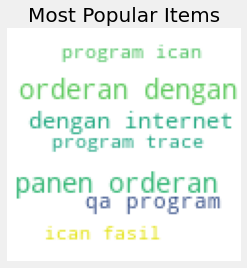

In [7]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data['name'].values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 120, height = 120,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()


In [9]:
data['name'].value_counts()

rqwrqw 213123                     23930
Panen Orderan dengan Internet     14207
test                               8927
QA Program : Trace                 8307
Program Ican Fasil                 8299
                                  ...  
Christian Studies 10                  1
Tes HTML edit 11                      1
Zumba A                               1
sebuah kuis                           1
SMC Perkusi Lower Intermediate        1
Name: name, Length: 855, dtype: int64

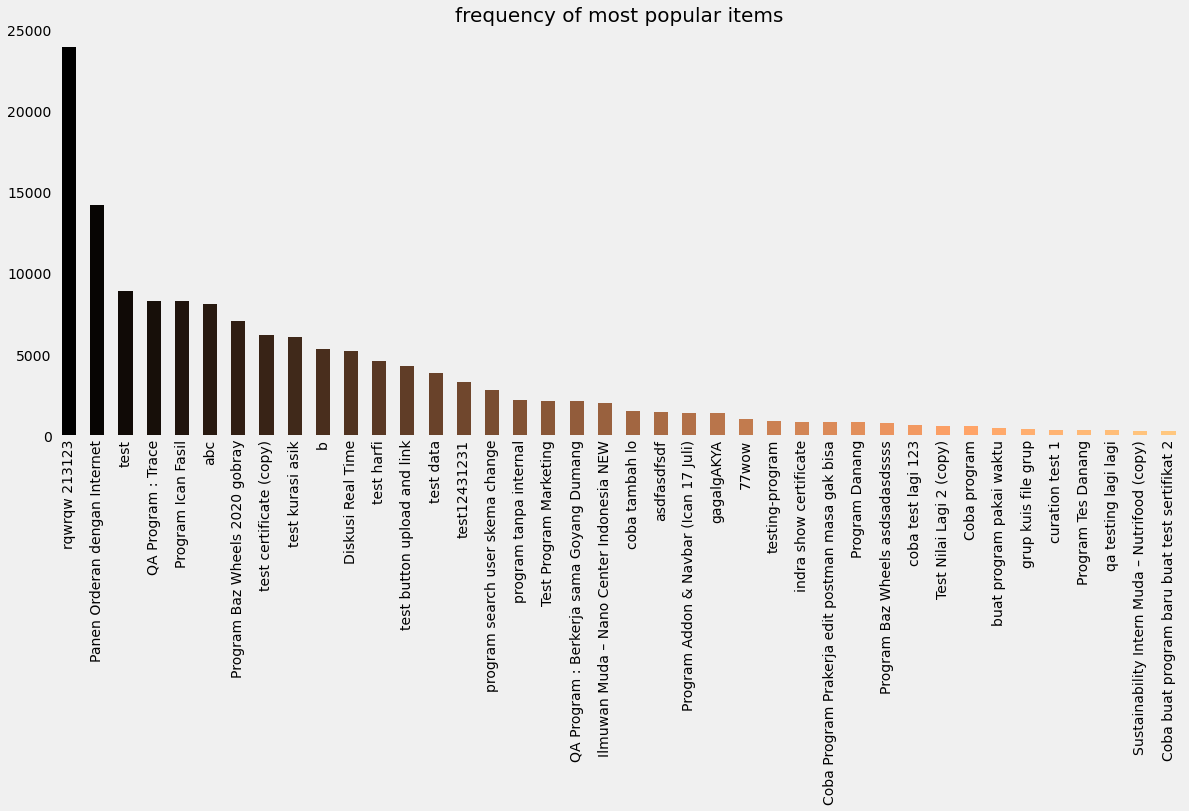

In [11]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data['name'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [14]:
y = data['name'].value_counts().head(50).to_frame()
y.index

Index(['rqwrqw 213123', 'Panen Orderan dengan Internet', 'test',
       'QA Program : Trace', 'Program Ican Fasil', 'abc',
       'Program Baz Wheels 2020 gobray', 'test certificate (copy)',
       'test kurasi asik', 'b', 'Diskusi Real Time', 'test harfi',
       'test button upload and link', 'test data', 'test12431231',
       'program search user skema change', 'program tanpa internal',
       'Test Program Marketing', 'QA Program : Berkerja sama Goyang Dumang',
       'Ilmuwan Muda – Nano Center Indonesia NEW', 'coba tambah lo',
       'asdfasdfsdf', 'Program Addon & Navbar (Ican 17 Juli)', 'gagalgAKYA',
       '77wow', 'testing-program', 'indra show certificate',
       'Coba Program Prakerja edit postman masa gak bisa', 'Program Danang',
       'Program Baz Wheels asdsadasdssss', 'coba test lagi 123',
       'Test Nilai Lagi 2 (copy)', 'Coba program', 'buat program pakai waktu',
       'grup kuis file grup', 'curation test 1', 'Program Tes Danang',
       'qa testing lagi lagi',

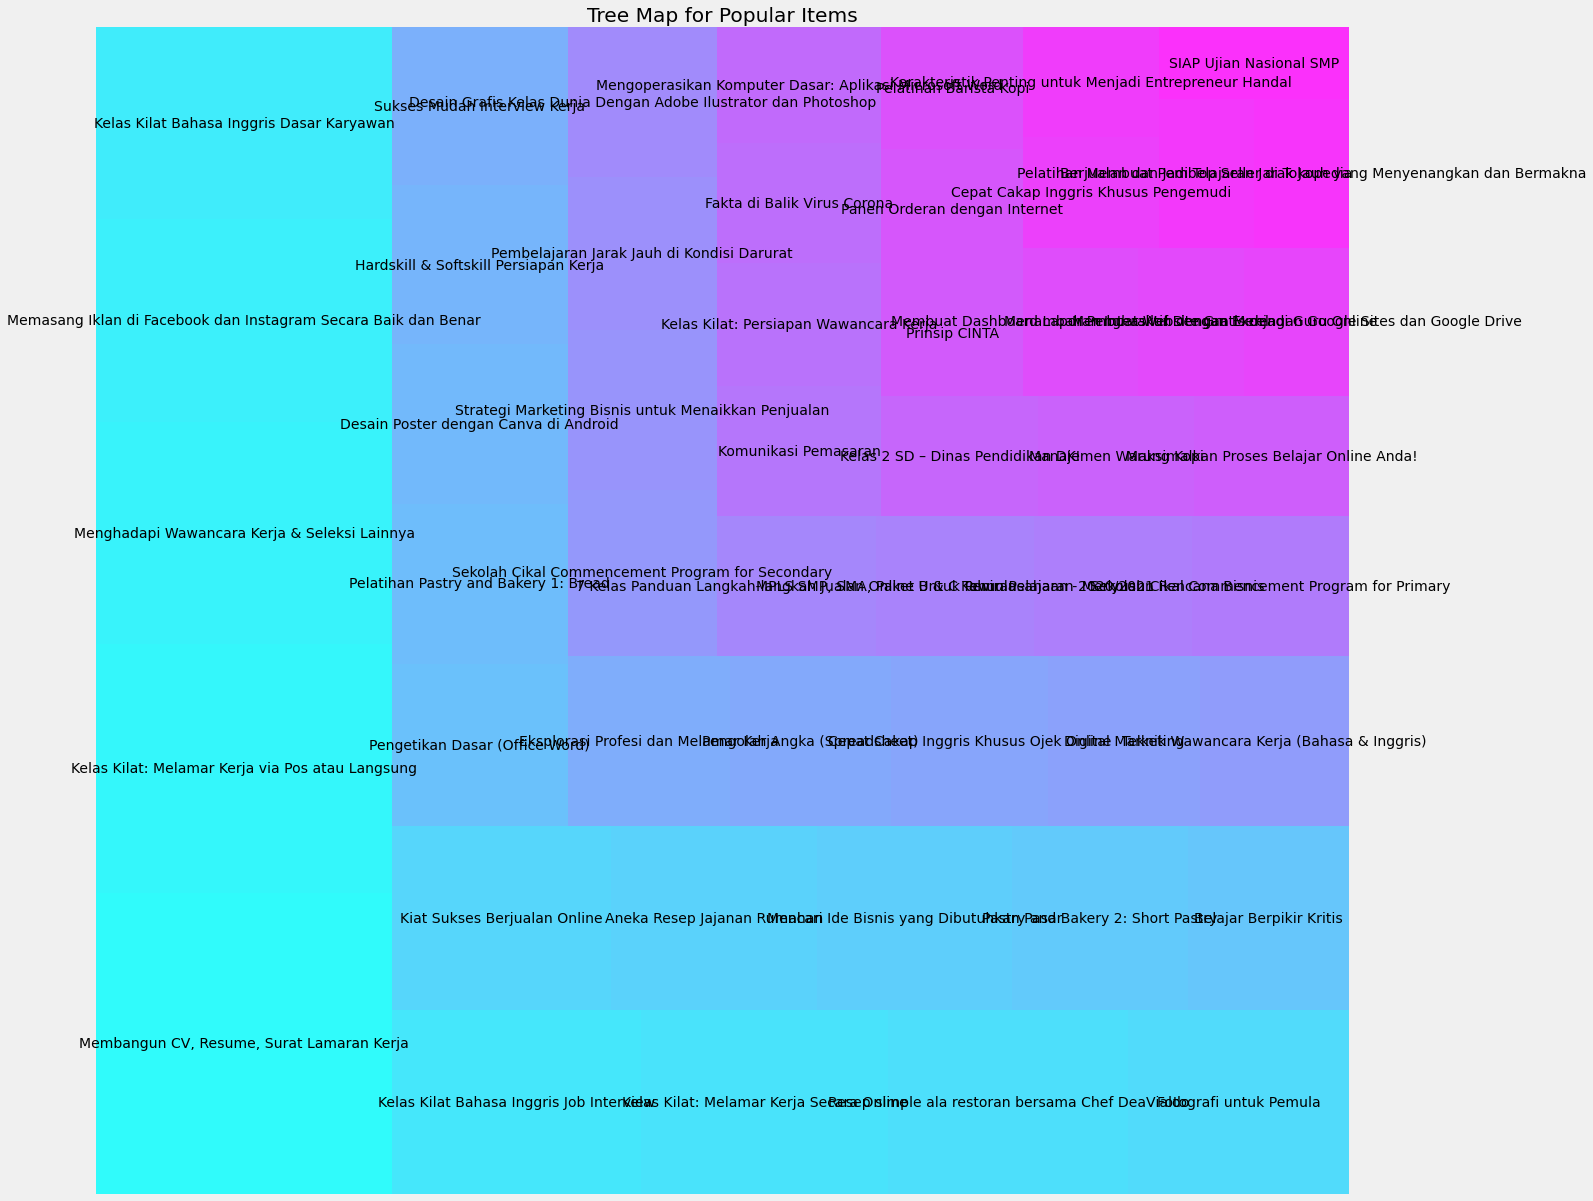

In [12]:
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [13]:
df['user_id'].unique()

array([    1,    15,    25, ..., 85314, 85321, 85330], dtype=int64)

In [23]:
test= pd.read_csv('test.csv')

In [24]:
test

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,...,item46,item47,item48,item49,item50,item51,item52,item53,item54,item55


In [ ]:
for i in data['user_id'].unique():
    to_append=data[data["user_id"] == i]['name'].values
    if len(to_append) < 55:
        for x in range(55-len(to_append)):
            to_append = np.append(to_append, [np.nan])
    df_length = len(test)
    haha = pd.Series(to_append, index=test.columns)
    test=test.append(haha, ignore_index=True)

In [55]:
test

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,...,item66,item67,item68,item69,item70,item71,item72,item73,item74,item75
0,Keanekaragaman Hayati Biologi Kelas X SMAN 24 ...,Sekolah Cikal - Kelas 6 - Matematika,Coba Program - Pengguna Jalan [Prasekolah/ 2-6...,Panduan Orang Tua Mendampingi Anak Belajar 202...,"Orientasi PAUD, RA, SD, MI, PaketA Tahun Pelaj...",Sampahku Tanggung Jawabku (PAUD),Menjadi Talenta Siap Bisnis,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fotografi untuk Pemula,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Keanekaragaman Hayati Biologi Kelas X SMAN 24 ...,Sekolah Cikal - Kelas 6 - Matematika,Coba Program - Pengguna Jalan [Prasekolah/ 2-6...,Panduan Orang Tua Mendampingi Anak Belajar 202...,"Orientasi PAUD, RA, SD, MI, PaketA Tahun Pelaj...",Sampahku Tanggung Jawabku (PAUD),Menjadi Talenta Siap Bisnis,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Orientasi PAUD, RA, SD, MI, PaketA Tahun Pelaj...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Konsumsi Ramah Lingkungan – WWF,Kita Lawan Corona : Pelajari Kembali Fakta Vir...,ENGLISH KELAS 8 - SMPN 199,Menjadi Fasilitator Belajar Guru Sekolahmu,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,"Mudahnya Desain PIN, MUG, Banner, Kaos Distro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10133,Bahasa Inggris Wajib Kelas X SMA/K-Dinas Pendi...,PJOK Kelas 10 SMA-Dinas Pendidikan Jakarta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10134,Kelas Kilat Bahasa Inggris Dasar Karyawan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10135,Teknik Wawancara Kerja (Bahasa & Inggris),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
test.to_csv('result.csv')